<a href="https://colab.research.google.com/github/FariasLeonardo/telecom-x-etl/blob/main/Telecom_X_etl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import requests


In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

try:
  df = pd.read_json(url)
  print ('✅ Dados extraídos com sucesso!')
  display (df.head())
except:
  print ('❌ Erro ao extrair os dados!')

✅ Dados extraídos com sucesso!


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
print ("---Informações Estruturadas---")
df.info()

---Informações Estruturadas---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
print ("---Tipo de dados---")
print (df.dtypes)

---Tipo de dados---
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


### Explodindo as colunas aninhadas para colunas individuais:

In [5]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])


### Concatenando em um único DataFrame limpo

In [6]:
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

print("--- Novo Formato dos Dados ---")
df_final.info()

--- Novo Formato dos Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract   

In [7]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


###Limpeza e tipagem

Converter Charges.Total para numérico

In [8]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
print (df_final.isnull().sum())

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


Remover linhas com Charges.Total nulo (geralmente clientes com tenure = 0)

In [9]:
df_final.dropna(subset=['Charges.Total'], inplace=True)
print (df_final.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


Verificar duplicados no customerID

In [10]:
duplicados = df_final['customerID'].duplicated().sum()
print(f"\nTotal de duplicados: {duplicados}")


Total de duplicados: 0


Remover a coluna customerID (não agrega valor estatístico para o modelo)

In [11]:
df_final.drop( columns='customerID', inplace=True)


In [12]:
df_final.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


#🔧 Transformação

Criando a coluna Contas_Diarias

In [13]:
# Dividimos o valor mensal por 30 para obter a estimativa diária
df_final['Contas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)

In [14]:
display(df_final[['Charges.Monthly', 'Contas_Diarias']].head())

,Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


Tradução da descrição das colunas

In [15]:
colunas_ptbr = {
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Valor_Mensal',
    'Charges.Total': 'Valor_Total'
}

df_final.rename(columns=colunas_ptbr, inplace=True)

In [20]:
df_final.head()

,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Valor_Mensal,Valor_Total,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


Binarização (Sim/Não para 1/0)

In [19]:
colunas_sim_nao = [
    'Churn', 'Parceiro', 'Dependentes', 'Servico_Telefone', 'Multiplas_Linhas',
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Fatura_Digital'
]

for col in colunas_sim_nao:
    if col in df_final.columns:
        df_final[col] = df_final[col].apply(lambda x: 1 if x == 'Yes' else 0)

print(f"Tipo da coluna Churn: {df_final['Churn'].dtype}")
print("Contagem de valores no Churn (0 e 1):")
print(df_final['Churn'].value_counts())

Tipo da coluna Churn: int64
Contagem de valores no Churn (0 e 1):
Churn
0    5387
1    1869
Name: count, dtype: int64


#📊 Carga e análise

Gerando estatísticas descritivas para colunas numéricas

In [22]:

estatisticas = df_final[['Meses_Contrato', 'Valor_Mensal', 'Valor_Total', 'Contas_Diarias']].describe()

# Adicionando a Mediana (que não vem por padrão no describe)
estatisticas.loc['median'] = df_final[['Meses_Contrato', 'Valor_Mensal', 'Valor_Total', 'Contas_Diarias']].median()

display(estatisticas)

,Meses_Contrato,Valor_Mensal,Valor_Total,Contas_Diarias
count,7256.000000,7256.000000,7256.000000,7256.000000
mean,32.395535,64.755423,2280.634213,2.158467
std,24.558067,30.125739,2268.632997,1.004282
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.450000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.900000,3785.300000,3.000000
max,72.000000,118.750000,8684.800000,3.960000
median,29.000000,70.300000,1391.000000,2.340000


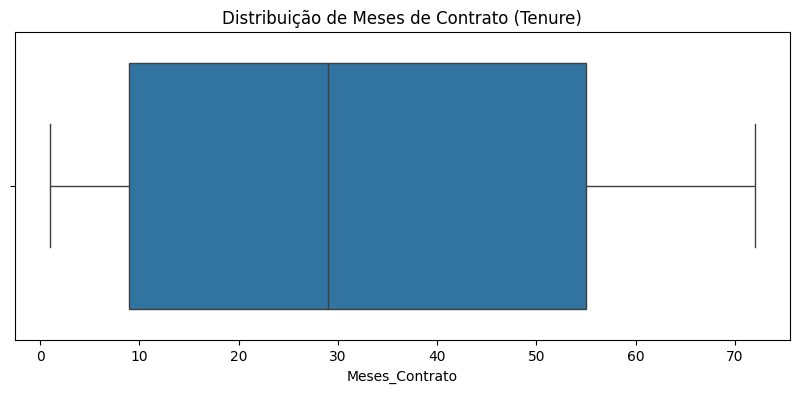

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a distribuição de Meses de Contrato
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_final['Meses_Contrato'])
plt.title('Distribuição de Meses de Contrato (Tenure)')
plt.show()

Checklist do que você descobriu:
[ ] Média de Gastos: Qual o faturamento médio por cliente?

[ ] Tempo de Casa: Em média, quanto tempo um cliente permanece antes de possivelmente dar Churn?

[ ] Anomalias: Existem valores negativos ou absurdamente altos que fugiram do ETL?

Distribuição da evasão

In [23]:
# Taxa de Churn e estatísticas rápidas
print(f"Taxa de Churn Média: {df_final['Churn'].mean():.2%}")
print(f"Total de Clientes que Saíram: {df_final['Churn'].sum()}")

Taxa de Churn Média: 25.76%
Total de Clientes que Saíram: 1869


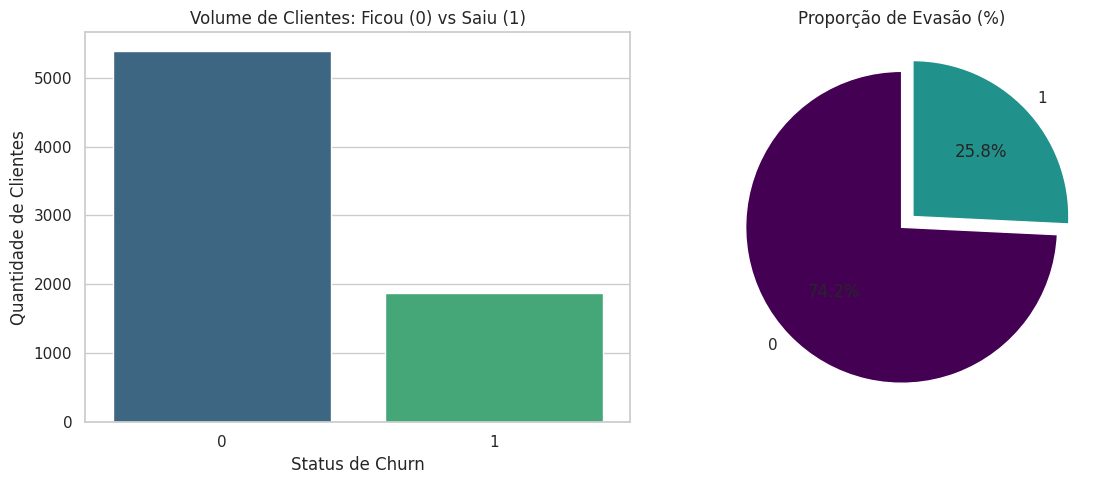

In [26]:
# Configurando o estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Gráfico de Barras (Volume)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Churn', data=df_final, palette='viridis', hue='Churn', legend=False)
plt.title('Volume de Clientes: Ficou (0) vs Saiu (1)')
plt.xlabel('Status de Churn')
plt.ylabel('Quantidade de Clientes')

# 2. Gráfico de Pizza (Proporção %)
plt.subplot(1, 2, 2)
df_final['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#440154', '#21918c'], explode=(0, 0.1))
plt.title('Proporção de Evasão (%)')
plt.ylabel('') # Remove o label lateral

plt.tight_layout()
plt.show()

Contagem de Evasão por Variáveis Categóricas

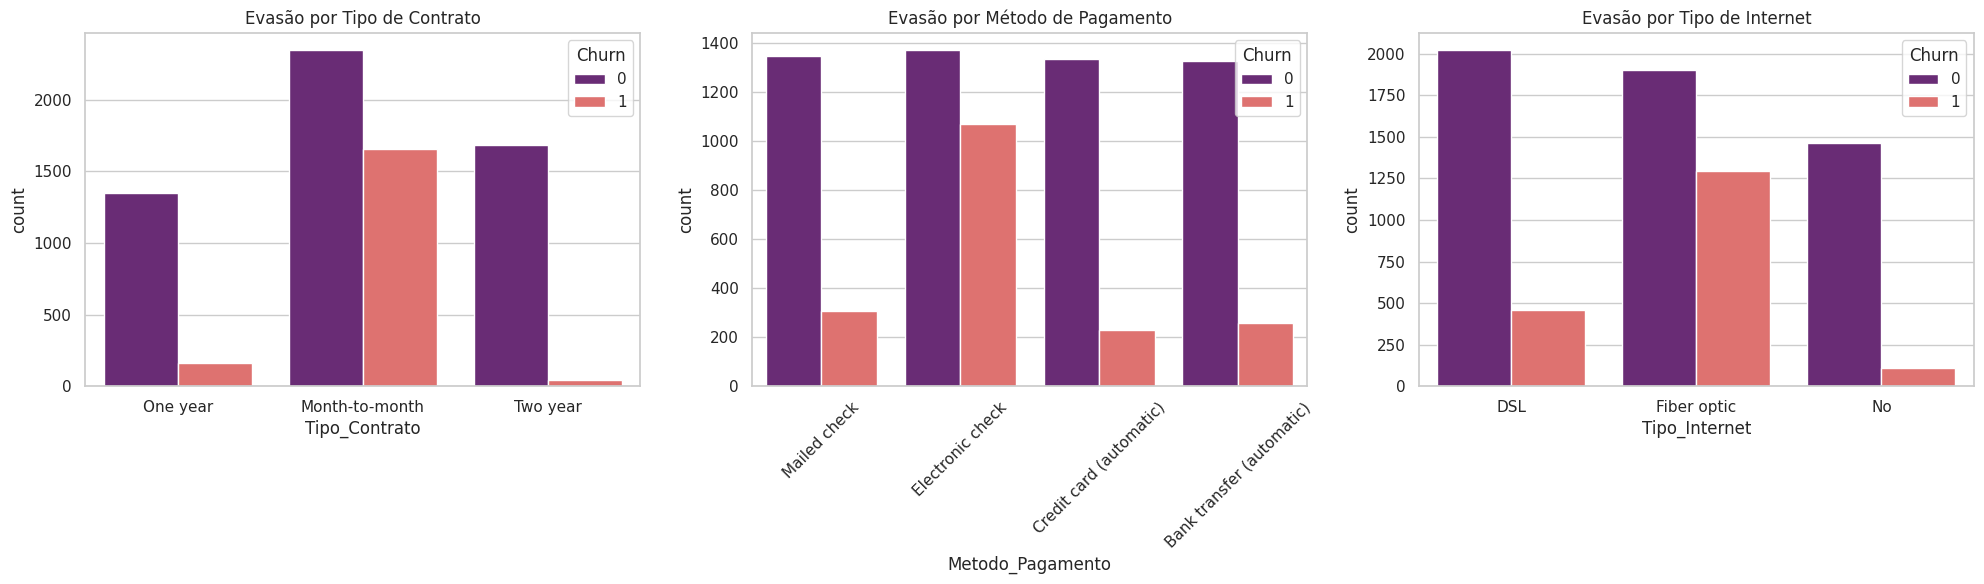

In [30]:
# Configurando o layout para 3 gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Churn por Tipo de Contrato (O "Vilão" nº 1)
sns.countplot(x='Tipo_Contrato', hue='Churn', data=df_final, ax=axes[0], palette='magma')
axes[0].set_title('Evasão por Tipo de Contrato')

# 2. Churn por Método de Pagamento (Fator operacional)
sns.countplot(x='Metodo_Pagamento', hue='Churn', data=df_final, ax=axes[1], palette='magma')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Evasão por Método de Pagamento')

# 3. Churn por Internet (Qualidade do serviço)
sns.countplot(x='Tipo_Internet', hue='Churn', data=df_final, ax=axes[2], palette='magma')
axes[2].set_title('Evasão por Tipo de Internet')

plt.tight_layout()
plt.show()

Contagem de Evasão por Variáveis Numéricas

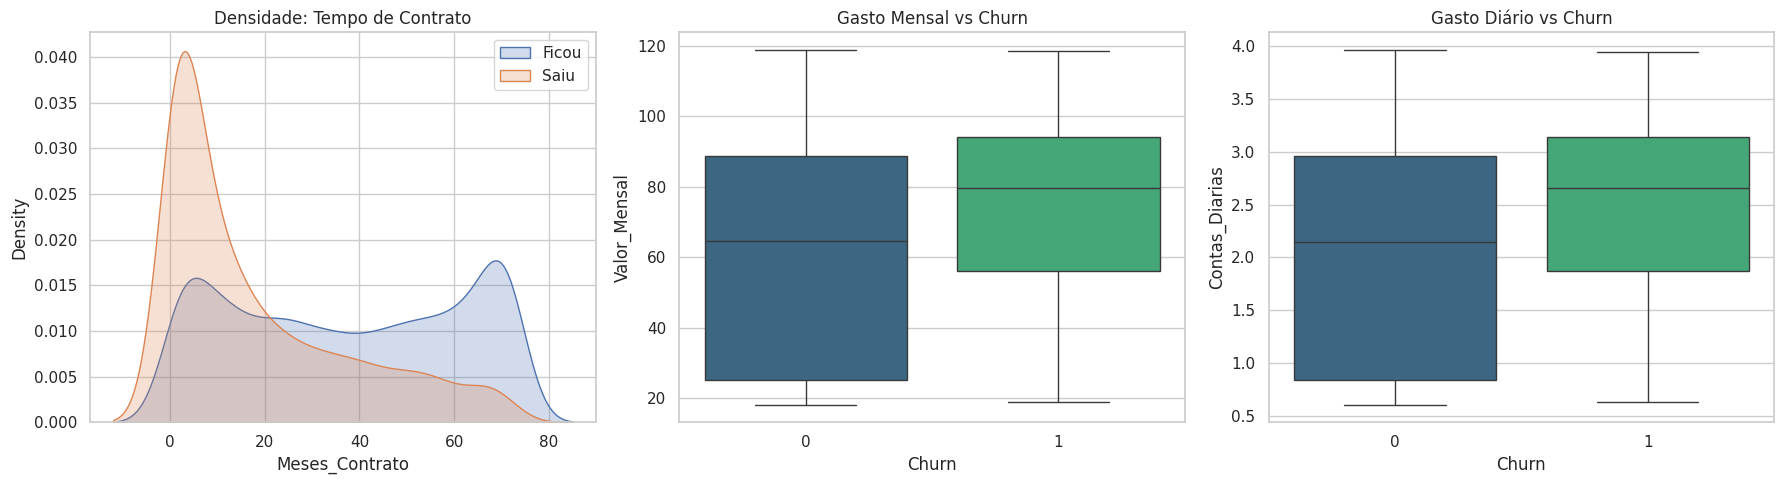

In [33]:
plt.figure(figsize=(18, 5))

# 1. Distribuição de Meses de Contrato (Tenure)
plt.subplot(1, 3, 1)
sns.kdeplot(df_final.loc[df_final['Churn'] == 0, 'Meses_Contrato'], label='Ficou', fill=True )
sns.kdeplot(df_final.loc[df_final['Churn'] == 1, 'Meses_Contrato'], label='Saiu', fill=True)
plt.title('Densidade: Tempo de Contrato')
plt.legend()

# 2. Distribuição de Valor Mensal
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='Valor_Mensal', data=df_final, palette='viridis', hue='Churn', legend=False)
plt.title('Gasto Mensal vs Churn')

# 3. Distribuição de Contas Diárias
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='Contas_Diarias', data=df_final, palette='viridis', hue='Churn', legend=False)
plt.title('Gasto Diário vs Churn')

plt.tight_layout()
plt.show()

#📄Relatorio Final

# 📊 Relatório Final: Projeto Telecom X - Análise de Churn

> **Objetivo:** Identificar os motivos de evasão de clientes e propor soluções estratégicas.

---

## 🛠️ 1. Limpeza e Tratamento de Dados (ETL)
Para garantir a qualidade da análise, os seguintes passos foram executados:

1.  **Extração:** Coleta de dados via API (JSON).
2.  **Normalização:** Expansão de colunas aninhadas como `customer`, `phone` e `account`.
3.  **Conversão de Tipos:** Transformação da coluna `Charges.Total` para formato numérico (`float`).
4.  **Feature Engineering:** Criação da métrica `Contas_Diarias` para análise de faturamento por dia.
5.  **Padronização:** Tradução de termos para PT-BR e binarização de colunas (Sim/Não para 1/0).

---

## 🔍 2. Análise Exploratória (EDA) - Principais Insights

Através das visualizações, detectamos padrões críticos que explicam o comportamento dos clientes.

### 🚩 Indicadores de Risco
| Variável | Observação Principal |
| :--- | :--- |
| **Taxa de Churn** | **25,8%** dos clientes abandonam a base. |
| **Tipo de Contrato** | Contratos **Mês a mês** representam o maior volume de evasão. |
| **Gasto Mensal** | Clientes que cancelam possuem faturas mais caras que a média. |
| **Tecnologia** | O serviço de **Fibra Óptica** apresenta maior rotatividade que o DSL. |

---

## 📈 3. Conclusões e Insights Estratégicos

* **Vulnerabilidade Inicial:** A densidade de Churn é altíssima nos primeiros meses de contrato (Tenure baixo).
* **Barreira de Preço:** Clientes com faturas elevadas são mais sensíveis à saída, indicando que o custo-benefício pode estar desequilibrado.
* **Fidelização:** Contratos de longo prazo (1 ou 2 anos) reduzem drasticamente a chance de cancelamento.

---

## 🚀 4. Recomendações para a Telecom X

1.  **Incentivo à Fidelidade:** Criar campanhas para migrar clientes "Mês a mês" para planos anuais.
2.  **Onboarding de Qualidade:** Focar nos primeiros 6 meses de uso com suporte proativo para evitar a evasão precoce.
3.  **Revisão do Plano de Fibra:** Auditar a qualidade técnica ou o preço do serviço de Fibra Óptica.
4.  **Facilitação de Pagamento:** Incentivar o débito automático para evitar o churn ligado ao método de "Cheque Eletrônico".

---
*Relatório gerado como parte do desafio de Análise de Dados na Telecom X.*

#Extra: Análise de Correlação entre Variáveis

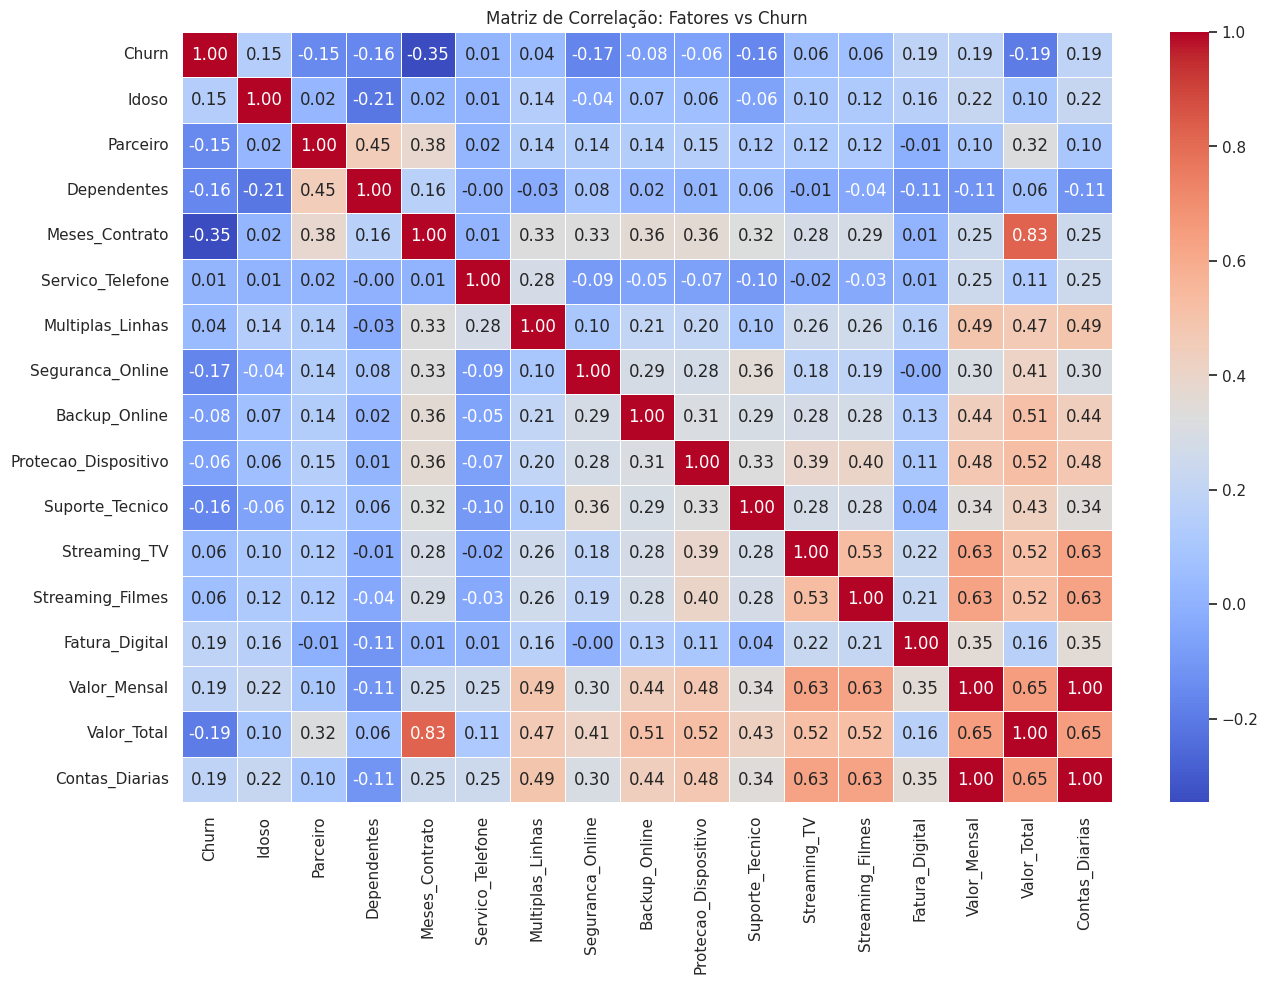

In [34]:
# 1. Calculando a matriz de correlação apenas para colunas numéricas
# Isso inclui as que binarizamos (0 e 1)
correlacoes = df_final.corr(numeric_only=True)

# 2. Criando o Heatmap (Mapa de Calor)
plt.figure(figsize=(15, 10))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação: Fatores vs Churn')
plt.show()

# 🚀 Insight Final e Conclusão Estratégica

A análise de correlação e o cruzamento de dados numéricos revelam que o **Churn** na Telecom X não é um evento isolado, mas sim o resultado de padrões comportamentais e financeiros claros.

### 🎯 O "Fator de Retenção"
A correlação mais forte identificada é entre **Meses de Contrato (Tenure) e Churn (-0.35)**. Isso confirma matematicamente que quanto mais tempo um cliente permanece na base, drasticamente menor é sua chance de cancelar. A densidade de evasão está concentrada nos primeiros **6 meses**, indicando que a experiência inicial do cliente é o ponto mais crítico da operação.

### 💰 O Peso do Ticket Médio
Observamos uma correlação positiva entre o **Valor Mensal e o Churn (0.19)**. O gráfico de *Boxplot* confirma que clientes que evadem pagam, em média, faturas mais altas. Isso sugere que a percepção de valor dos serviços premium pode estar abaixo do preço de mercado, ou que esses clientes são mais visados pela concorrência.

### 🛡️ O Efeito "Stickiness" (Aderência)
Variáveis como **Segurança Online (-0.17)** e **Suporte Técnico (-0.16)** apresentam correlação negativa com a evasão. Clientes que contratam serviços de suporte e segurança digital tendem a ser mais fiéis, criando uma barreira de saída que protege a receita da empresa.

---

### 📢 Recomendações Executivas
1.  **Blindagem do Onboarding:** Implementar um programa de sucesso do cliente focado nos primeiros 180 dias para reduzir o pico de churn precoce.
2.  **Conversão de Contrato:** Focar a força de vendas na migração de clientes "Month-to-month" para planos anuais, utilizando o "Valor Mensal" elevado como alavanca para oferecer descontos em troca de fidelidade.
3.  **Pacotes de Valor:** Empacotar serviços de Suporte Técnico e Segurança Online em planos de Fibra Óptica, combatendo a alta taxa de evasão observada nesse segmento tecnológico.

---

### ✅ Projeto Finalizado
Com estes insights, o time de **Data Science** agora possui as variáveis de maior peso para treinar modelos preditivos de alta precisão, permitindo que a Telecom X antecipe quem irá sair e aja proativamente.